# 1. Importing Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib
import warnings
warnings.filterwarnings("ignore")


#  2 . Load Dataset 

In [4]:
data = pd.read_csv("student_performance.csv")

# Quick look at the dataset
print("First 5 rows:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# ---- STEP 3: Data Cleaning ----
# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

First 5 rows:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0 

# 3. Data Cleaning

In [5]:
print("\nMissing values per column:")
print(data.isnull().sum())


Missing values per column:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


# 4. EDA and Target Selection

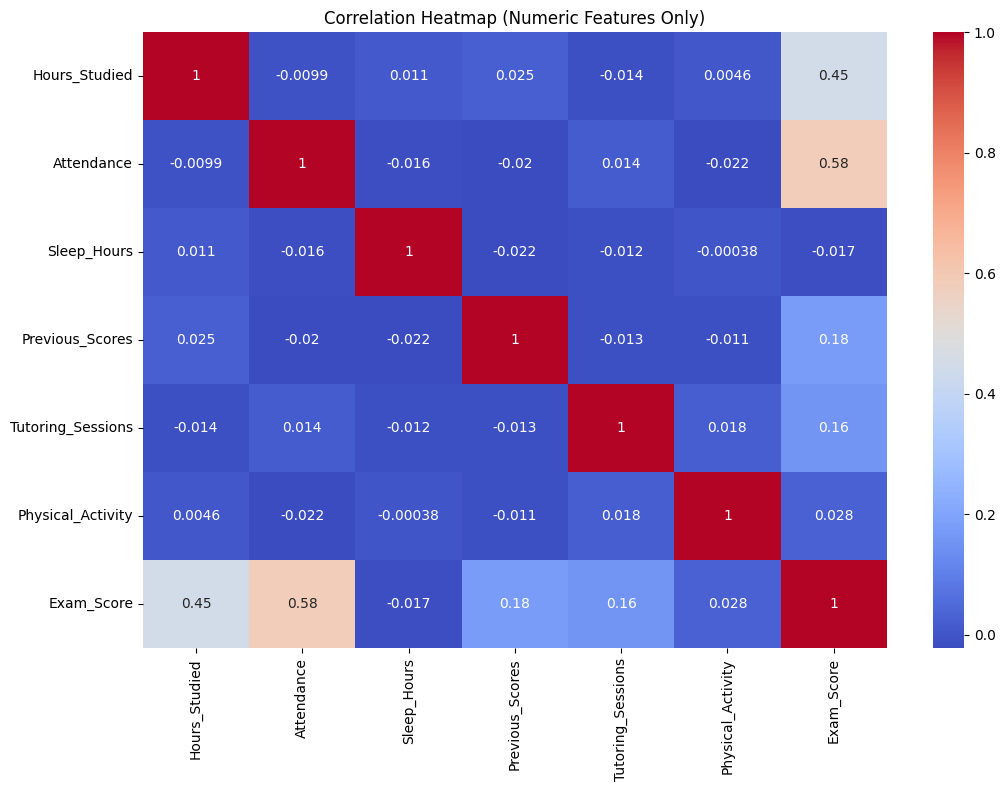

In [10]:
# Correlation heatmap (numeric only)
plt.figure(figsize=(12,8))
sns.heatmap(
    data.select_dtypes(include=["number"]).corr(),
    annot=True, cmap="coolwarm"
)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

# Target Selection
X = data[["Hours_Studied"]]   # Feature(s)
y = data["Exam_Score"]        # Target

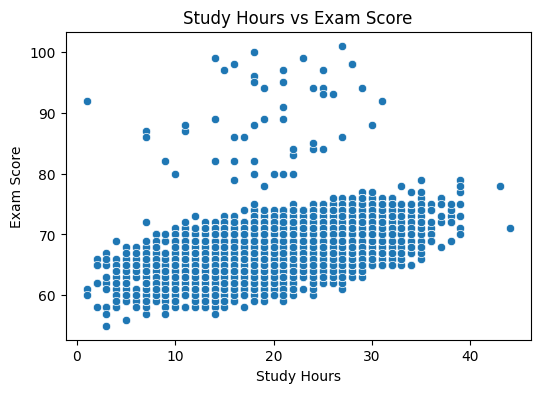

In [11]:
# Scatterplot
plt.figure(figsize=(6,4))
sns.scatterplot(x="Hours_Studied", y="Exam_Score", data=data)
plt.title("Study Hours vs Exam Score")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()



# 5. Model Training

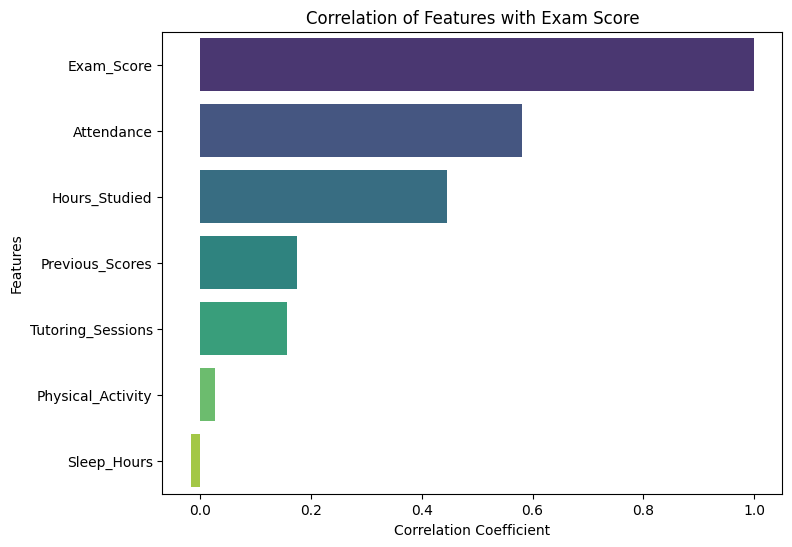

In [13]:
# Correlation bar plot with Exam Score
corr_with_target = (
    data.select_dtypes(include=["number"])
    .corr()["Exam_Score"]
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,6))
sns.barplot(
    x=corr_with_target.values,
    y=corr_with_target.index,
    palette="viridis"
)
plt.title("Correlation of Features with Exam Score")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()



In [14]:

# Single-feature regression
X_single = data[["Hours_Studied"]]
y = data["Exam_Score"]
# Multi-feature regression (bonus)
X_multi = data[["Hours_Studied", "Attendance", "Sleep_Hours", "Previous_Scores"]]

In [15]:


X_train, X_test, y_train, y_test = train_test_split(
    X_single, y, test_size=0.2, random_state=42
)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

# 6. Model Evaluation

In [16]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n📊 Linear Regression (Single Feature) Performance:")
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")


📊 Linear Regression (Single Feature) Performance:
MAE:  2.45
MSE:  10.86
RMSE: 3.29
R²:   0.23


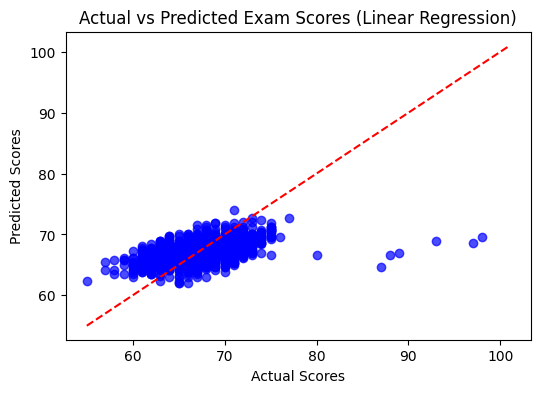

In [17]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Exam Scores (Linear Regression)")
plt.show()

# 7. Polynomial Regression (BONUS)

In [18]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

y_poly_pred = poly_model.predict(X_poly_test)

mae_poly = mean_absolute_error(y_test, y_poly_pred)
mse_poly = mean_squared_error(y_test, y_poly_pred)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_poly_pred)

print("\n📊 Polynomial Regression (Single Feature) Performance:")
print(f"MAE:  {mae_poly:.2f}")
print(f"MSE:  {mse_poly:.2f}")
print(f"RMSE: {rmse_poly:.2f}")
print(f"R²:   {r2_poly:.2f}")



📊 Polynomial Regression (Single Feature) Performance:
MAE:  2.44
MSE:  10.84
RMSE: 3.29
R²:   0.23


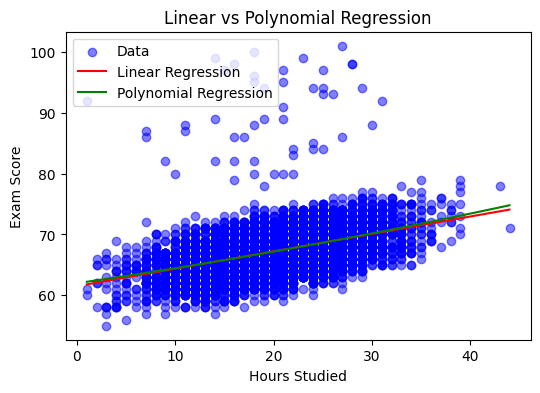

In [19]:
plt.figure(figsize=(6,4))
plt.scatter(X_single, y, color="blue", alpha=0.5, label="Data")
X_range = np.linspace(X_single.min(), X_single.max(), 100).reshape(-1, 1)
plt.plot(X_range, lr_model.predict(X_range), color="red", label="Linear Regression")
plt.plot(X_range, poly_model.predict(poly.transform(X_range)), color="green", label="Polynomial Regression")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Linear vs Polynomial Regression")
plt.legend()
plt.show()

# 8. Multi-Feature Regression (BONUS)

In [20]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y, test_size=0.2, random_state=42
)

multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)

y_multi_pred = multi_model.predict(X_test_multi)

mae_multi = mean_absolute_error(y_test_multi, y_multi_pred)
r2_multi = r2_score(y_test_multi, y_multi_pred)

print("\n📊 Linear Regression (Multi-Feature) Performance:")
print(f"MAE:  {mae_multi:.2f}")
print(f"R²:   {r2_multi:.2f}")



📊 Linear Regression (Multi-Feature) Performance:
MAE:  1.36
R²:   0.62


In [21]:
joblib.dump(lr_model, "linear_regression_model.pkl")
joblib.dump(poly_model, "polynomial_regression_model.pkl")
joblib.dump(multi_model, "multi_feature_regression_model.pkl")

['multi_feature_regression_model.pkl']